# Word Map
Using the unsupersived machine learning algorithm known as the self-organizing map (SOM), I have created a word map, where common English words are clustered together by their semantic similarity.

To begin, I modified a list of the most common English words, which I found here:
https://www.kaggle.com/datasets/rtatman/english-word-frequency

I then used the feature extraction task provided by Hugging Face to retrieve the vector embeddings of each word, according to the specified model. The vector embedding are a representation of the meaning of the word in a multidimensional space.

The purpose of the SOM algorithm is to produce a 2-dimensional map of multidimensional space by preserving its topography. The number of nodes for a map are first specified by the user, then the nodes are fit to the data to describe its topography. As the nodes are fit to the data, each node will describe a cluster in the data space. Since topology is preserved, the nodes that are close to each other in map are also close to each other in the data space, meaning that the clusters of data identified by each node share similarities for adjacent nodes.

The word map that I have created is defined by a grid 100 nodes. To get an idea of what the map looks like, I have plotted the nodes with a sample of 15 words from the word cluster surrounding each node.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn_som.som import SOM
from sklearn.datasets import fetch_openml
from transformers import pipeline

In [2]:
# initialize feature extraction object using pipeline
feature_extractor = pipeline("feature-extraction", framework="pt", model="facebook/bart-base")

Device set to use mps:0


In [3]:
# import list of most common English words
data = pd.read_csv("common_words.csv")

In [4]:
words = data['word']

Now that we have a list of all the words, we will use the feature extractor to retrieve the vector embeddings for each word.

In [5]:
word_points = []
for word in words:
    word_points.append(feature_extractor(str(word),return_tensors = "pt")[0].numpy().mean(axis=0))
word_points = np.array(word_points)

Now we create the SOM. We initialize a 10x10 grid of nodes. We need to specify the dimensions of the input, which in this case is 768 (the number of vectors that make up the vector embedding). After we fit the map to the words, we transform it to organize the data, then we retrieve the closest node for each word.

To visualize the map, we will take a sample of 10 words closest to each node and plot them. We will make a plot for each of the 100 nodes, color coded to distinguish between different nodes. Note that some nodes are empty, so no words are plotted in that space.

In [6]:
# initiate a 10x10 map with input dimensions = 768
word_som = SOM(m=10, n=10, dim=768)
word_som.fit(word_points)

In [7]:
# transform the map to organize the training data
word_map = word_som.transform(word_points)

In [8]:
# find the closest node for each data point
word_categories = word_som.predict(word_points)

So we can see some similiarities between some of the clusters. For instance, many names of places are plotted in the upper-right corner. We can also see a cluster of short words near the center.

Now that we've created the SOM, let's save it and the list of nodes closest to each word (word categories array).

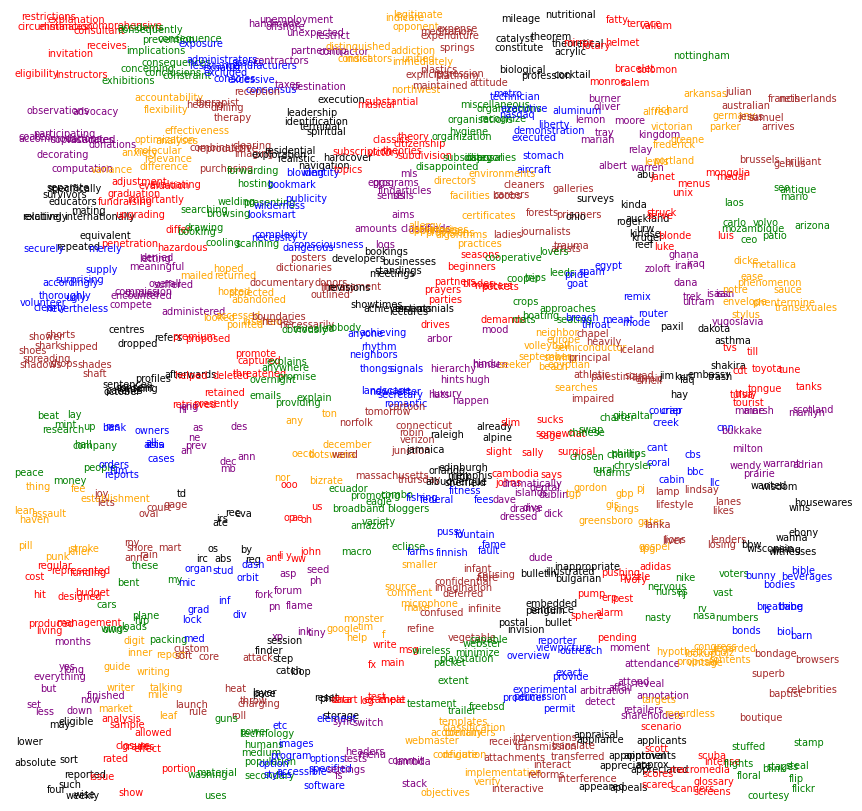

In [17]:
# define colors for words
colors = ['red', 'green', 'blue', 'purple',
          'orange', 'brown', 'black']

plt.figure(figsize=(10, 10))
# plot the words assigned to each node
for i in range(100):
    plt.subplot(10,10,i+1)  # 100 images in a 10x10 grid
    plt.axis('off')
    word_cluster = words[word_categories==i]

    for word in word_cluster.sample(min(len(word_cluster), 10)):
        x = np.random.uniform(0,1.2)
        y = np.random.uniform(0,1.2)
        plt.text(x, y, word, color=colors[i%7], size=7)
        
plt.show()

In [20]:
# save the model with pickle
import pickle

with open("word_som.pkl", "wb") as model_file:
    pickle.dump(word_som, model_file)

In [21]:
# save the word categories array to a CSV file
np.savetxt('word_categories.csv', word_categories, delimiter=',', fmt='%d')